<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Machine_Learning_Introdu%C3%A7%C3%A3o_a_algoritmos_n%C3%A3o_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/raw/master/movies.csv'
filmes = pd.read_csv(url)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [8]:
generos_escalados.shape

(9742, 20)

In [9]:
from sklearn.cluster import KMeans

In [10]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [1 1 0 ... 0 1 0]


In [11]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03128468 -0.25674864 -0.24768042 -0.24249968 -0.19200074  0.20146022
  -0.17163986  0.11195046  0.13352241 -0.17795142 -0.08992195 -0.12102374
  -0.10976362  0.01078333 -0.18729702  0.15937682 -0.17584939 -0.48729404
   0.06960787  0.04201073]
 [-0.05917995  0.52701988  1.50848553  1.64594423  1.43740635 -0.00865302
  -0.30361493 -0.20974139 -0.6688866   1.1793275  -0.09492563 -0.24303553
   0.6231515   0.24929492 -0.1439877  -0.2904784   0.56958731 -0.418076
  -0.17300586 -0.10107549]
 [-0.05917995  0.46151145 -0.1395015  -0.23539898 -0.26485201 -0.59884773
   0.69202924 -0.21295942 -0.00917794 -0.15607699  0.32505415  0.5048812
  -0.03530281 -0.17807889  0.64563528 -0.30792276  0.19411624  1.70517094
  -0

In [12]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.031285,-0.256749,-0.247680,-0.242500,-0.192001,0.201460,-0.171640,0.111950,0.133522,-0.177951,-0.089922,-0.121024,-0.109764,0.010783,-0.187297,0.159377,-0.175849,-0.487294,0.069608,0.042011
1,-0.059180,0.527020,1.508486,1.645944,1.437406,-0.008653,-0.303615,-0.209741,-0.668887,1.179328,-0.094926,-0.243036,0.623152,0.249295,-0.143988,-0.290478,0.569587,-0.418076,-0.173006,-0.101075
2,-0.059180,0.461511,-0.139501,-0.235399,-0.264852,-0.598848,0.692029,-0.212959,-0.009178,-0.156077,0.325054,0.504881,-0.035303,-0.178079,0.645635,-0.307923,0.194116,1.705171,-0.107509,-0.066838


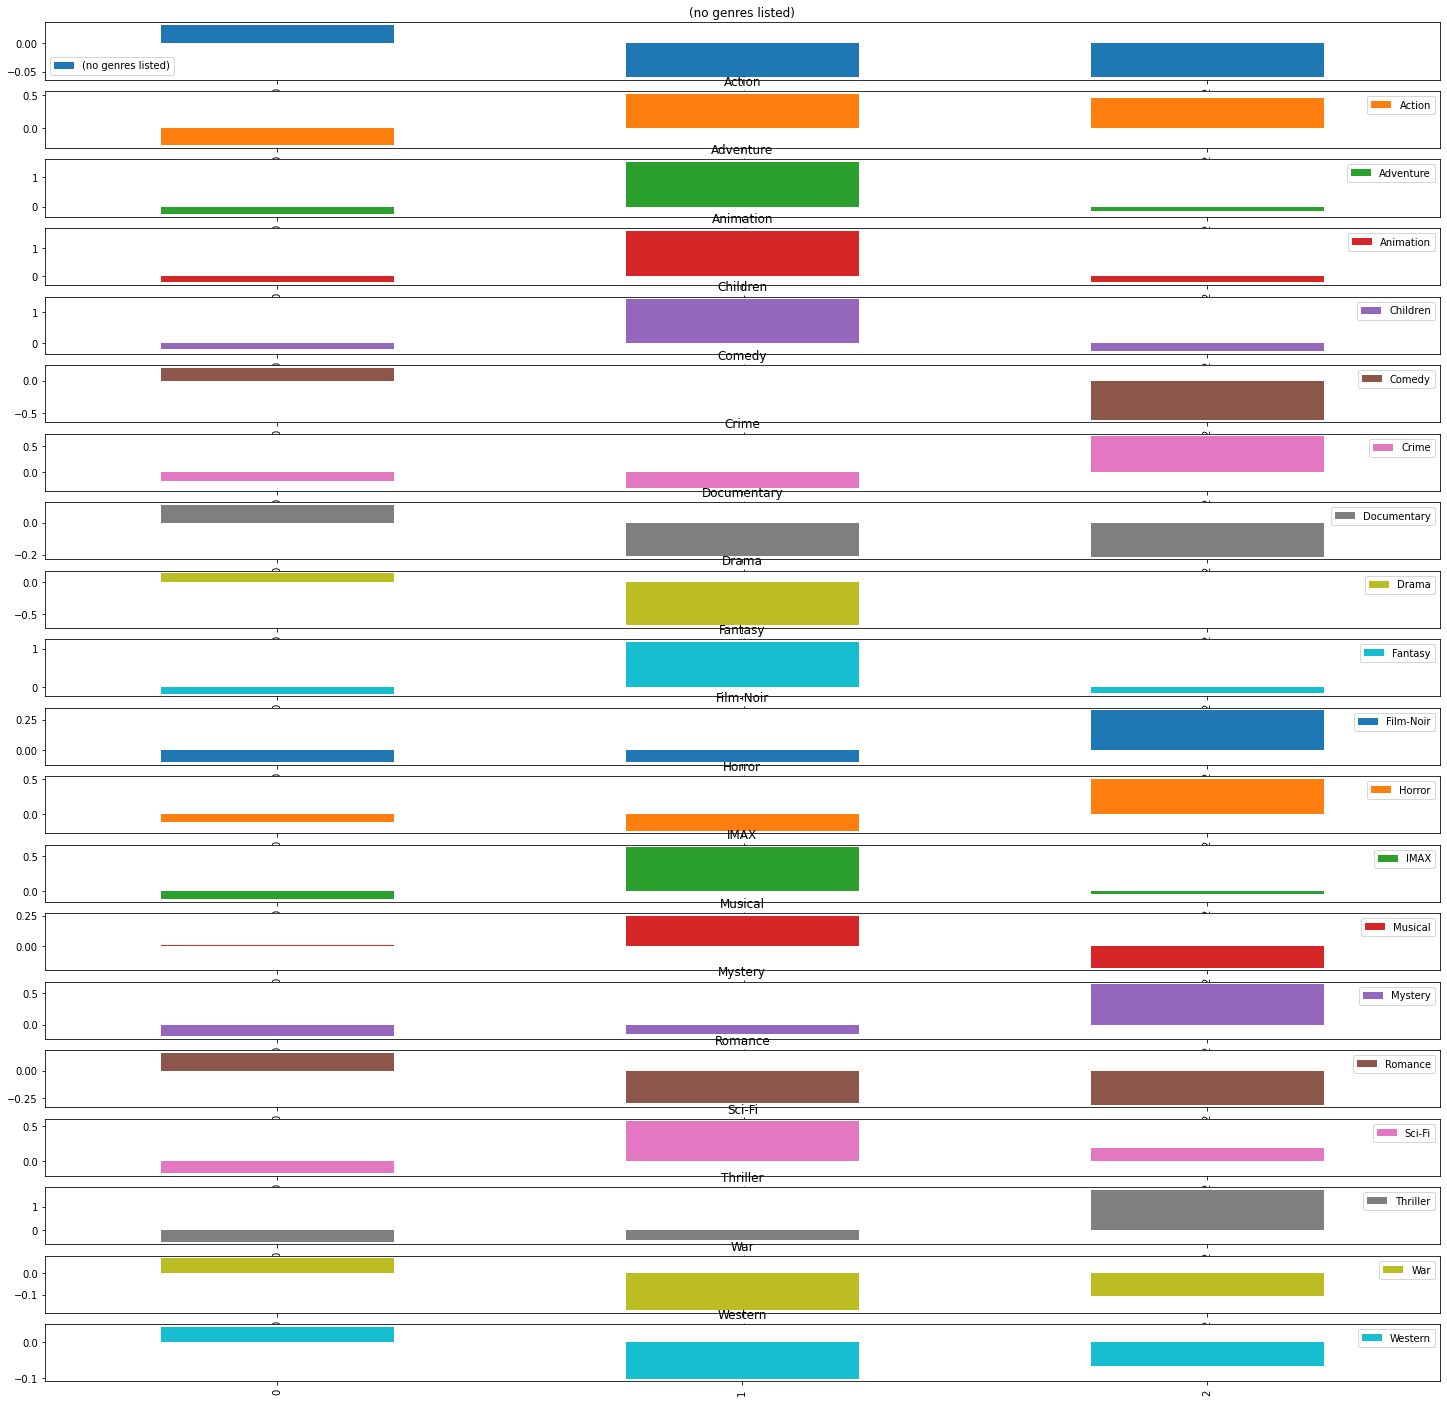

In [13]:
grupos.plot.bar(subplots=True, figsize=(25,25), sharex=False);

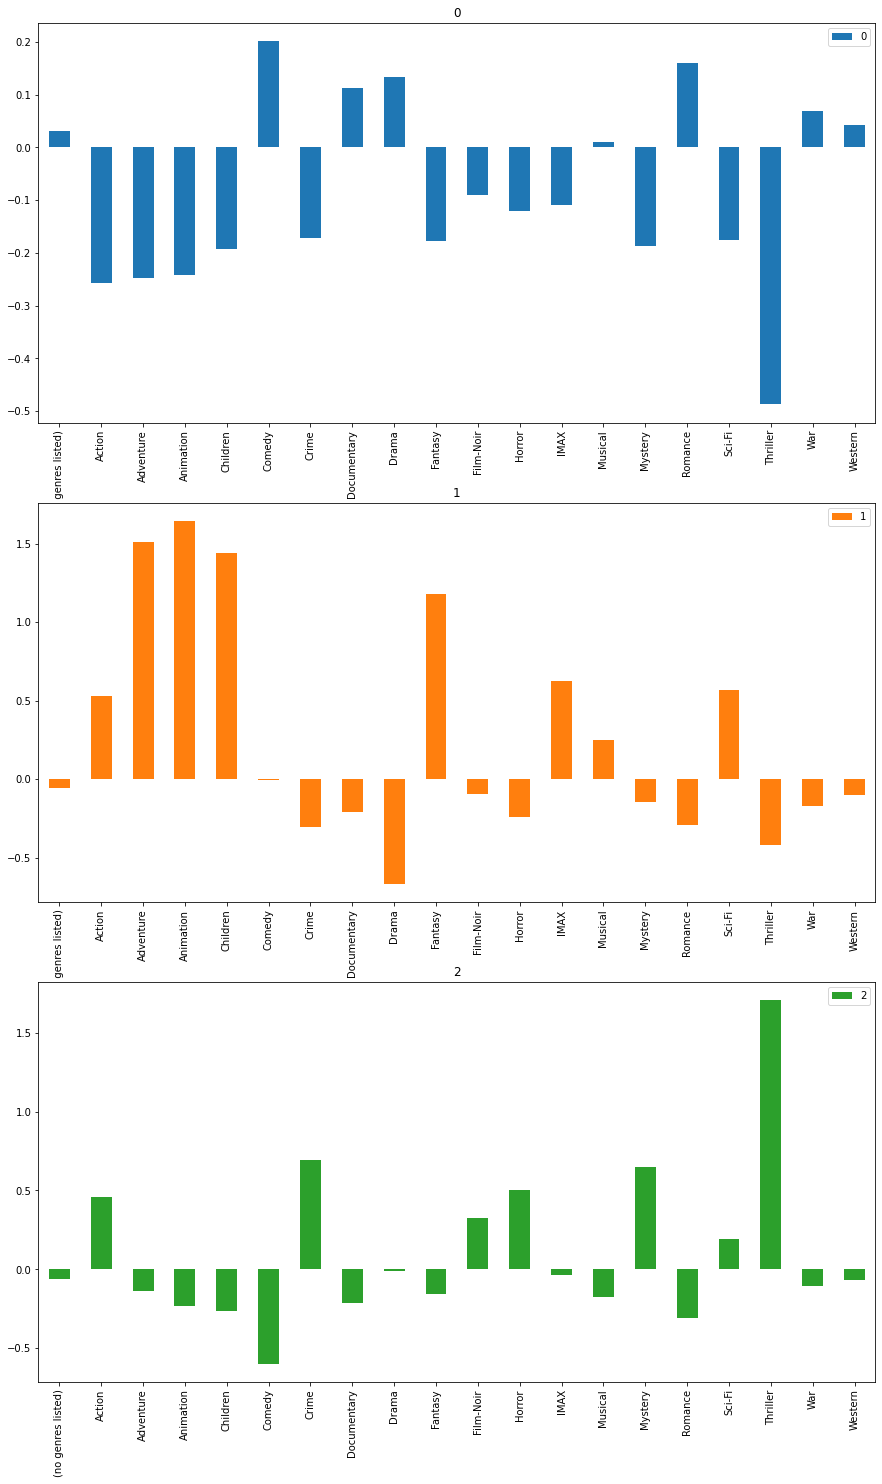

In [17]:
grupos.T.plot.bar(subplots=True, figsize=(15,25), sharex=False);

In [19]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5126,8190,"Americanization of Emily, The (1964)",Comedy|Drama|War,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5034,7839,Love Crazy (1941),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5424,25870,Here Comes Mr. Jordan (1941),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
727,947,My Man Godfrey (1936),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6218,45668,"Lake House, The (2006)",Drama|Fantasy|Romance,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4955,7486,Happy Together (a.k.a. Buenos Aires Affair) (C...,Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6093,42013,"Ringer, The (2005)",Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6042,39715,American Pie Presents: Band Camp (American Pie...,Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4275,6241,Pauline at the Beach (Pauline à la Plage) (1983),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7818,92665,"For a Good Time, Call... (2012)",Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-76.29129  ,  20.606691 ],
       [-37.749958 ,  32.40237  ],
       [-16.23545  , -46.003616 ],
       ...,
       [ -2.1814947, -24.35575  ],
       [ 31.191376 ,  66.52934  ],
       [ 10.826208 ,  11.521943 ]], dtype=float32)

In [23]:
import seaborn as sns

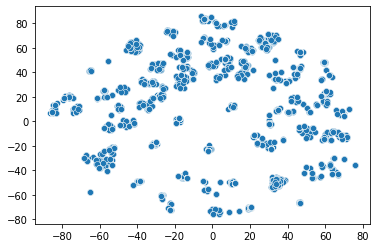

In [24]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1])